<a href="https://colab.research.google.com/github/MerkulovDaniil/optim/blob/master/assets/Notebooks/Line_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General formulation
Suppose, we have a problem of minimization function $f(x): \mathbb{R} \to \mathbb{R}$ of scalar variable:
$$
f(x) \to \min_{x \in \mathbb{R}}
$$

Sometimes, we refer to the similar problem of finding minimum on the line segment $[a,b]$:

$$
f(x) \to \min_{x \in [a,b]}
$$

## Random search

In [0]:
from scipy.optimize import OptimizeResult
from scipy.optimize import minimize

def callback(xk, f, funs, xs, loc_lens):
    funs.append(f(xk))
    xs.append(xk)
    loc_lens.append(x_b - x_a)

def random_line_search(fun, x0, args=(), maxfev=None,
        maxiter=100, callback=None, **options):
    tol, x_a, x_b = options['tol'], options['x_a'], options['x_b']
    x_best = x0
    f_best = fun(x0)
    funcalls = 1
    niter = 0
    stop = False
    success = False

    while not stop and niter < maxiter:
        improved = False
        niter += 1
        funcalls += 1
        x_guess = np.random.uniform(x_a,x_b)
        f_guess = fun(x_guess)
        
        if f_guess <= f_best:
            f_best = f_guess
            x_best = x_guess
        
        if callback is not None:
            callback(x_best)
        
        if (x_b - x_a < tol):
            success = True

        if (maxfev is not None and funcalls >= maxfev) or (x_b - x_a < tol):
            stop = True
            break

    return OptimizeResult(fun=f_best, x=x_best, nit=niter,
                          nfev=funcalls, success=(niter > 1))
    
def random_bracket_line_search(fun, x0, args=(), maxfev=None,
        maxiter=100, callback=None, **options):
    tol, x_a, x_b = options['tol'], options['x_a'], options['x_b']
    x_best = x0
    funcalls = 0
    niter = 0
    stop = False
    success = False

    while not stop and niter < maxiter:
        improved = False
        niter += 1
        funcalls += 2
        
        x_guess_left    = np.random.uniform(x_a, x_b)
        x_guess_right   = np.random.uniform(x_a, x_b)
        x_guess_left, x_guess_right = min(x_guess_left, x_guess_right), max(x_guess_left, x_guess_right)
        f_guess_left    = fun(x_guess_left)
        f_guess_right   = fun(x_guess_right)

        if f_guess_left <= f_guess_right:
            x_b = x_guess_right
        else:
            x_a = x_guess_left

        x_best = (x_a + x_b)/2
        f_best = fun(x_best)
        
        if callback is not None:
            callback(x_best)
        
        if (x_b - x_a < tol):
            success = True

        if (maxfev is not None and funcalls >= maxfev) or (x_b - x_a < tol):
            stop = True
            break

        
    return OptimizeResult(fun=f_best, x=x_best, nit=niter,
                          nfev=funcalls, success=success)

# Binary search

In [0]:
def binary_search(fun, x0, args=(), maxfev=None,
        maxiter=100, callback=None, **options):
    tol, x_a, x_b = options['tol'], options['x_a'], options['x_b']
    x_best = x0
    funcalls = 1
    niter = 0
    stop = False
    success = False

    while not stop and niter < maxiter:
        niter += 1
        x_c = (x_a + x_b) / 2
        x_y = (x_a + x_c) / 2
        funcalls += 1
        if fun(x_y) <= fun(x_c):
            x_b = x_c
            x_c = x_y
        else:
            x_z = (x_b + x_c) / 2
            funcalls += 1
            if fun(x_c) <= fun(x_z):
                x_a = x_y
                x_b = x_z
            else:
                x_a = x_c
                x_c = x_z

        x_best = x_c
        f_best = fun(x_c)
        
        if callback is not None:
            callback(x_best)
        
        if (x_b - x_a < tol):
            success = True

        if (maxfev is not None and funcalls >= maxfev) or (x_b - x_a < tol):
            stop = True
            break

        
    return OptimizeResult(fun=f_best, x=x_best, nit=niter,
                          nfev=funcalls, success=success)

# Golden search

In [0]:
 def golden_search(fun, x0, args=(), maxfev=None,
        maxiter=100, callback=None, **options):
    tol, x_a, x_b = options['tol'], options['x_a'], options['x_b']
    x_best = x0
    funcalls = 1
    niter = 0
    stop = False
    success = False

    while not stop and niter < maxiter:
        niter += 1
        tau = (np.sqrt(5) + 1) / 2.0
        x_y = x_a + (x_b - x_a) / tau**2
        x_z = x_a + (x_b - x_a) / tau
        funcalls += 1
        if f(x_y) <= f(x_z):
            x_b = x_z
            x_z = x_y
            x_y = x_a + (x_b - x_a) / tau**2
        else:
            x_a = x_y
            x_y = x_z
            x_z = x_a + (x_b - x_a) / tau

        x_best = x_z
        f_best = fun(x_z)
        
        if callback is not None:
            callback(x_best)
        
        if (x_b - x_a < tol):
            success = True

        if (maxfev is not None and funcalls >= maxfev) or (x_b - x_a < tol):
            stop = True
            break

    return OptimizeResult(fun=f_best, x=x_best, nit=niter,
                          nfev=funcalls, success=success)

# Fibbonaci method

# Successive parabolic interpolation

# Brent's method

In [0]:
f_1 = lambda x: np.sin(np.sin(np.sin(np.sqrt(x/2))))
# x = np.linspace(10,120)

def inverse_maxwell(x, a):
    return -np.sqrt(2/math.pi) * x**2*np.exp(-x**2/(2*(a)**2))/(a)**3
f_2 = lambda x: inverse_maxwell(x, 2) + 1
# x = np.linspace(0,10)
f_3 = lambda x: (x - 2) * x * (x + 2)**2 + 10

def callback(xk, f, funs, xs):
    funs.append(f(xk))
    xs.append(xk)

🤓 We'll compare ['random search', 'binary search', 'golden search'] on the Inverse Maxwell function on the [0, 10] interval


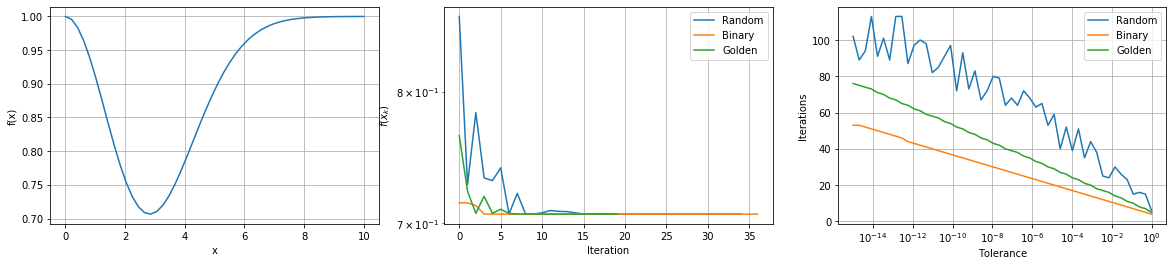

In [310]:
#@title Line search optimizers comparison { run: "auto" }
optimizers = []
Random_bracket_search = True #@param {type:"boolean"}
Binary_search = True #@param {type:"boolean"}
Golden_search = True #@param {type:"boolean"}
if Random_bracket_search:
    optimizers.append('random search')
if Binary_search:
    optimizers.append('binary search')
if Golden_search:
    optimizers.append('golden search')

Function = 'Inverse Maxwell' #@param ['Inverse Maxwell', "sin(sin(sin(sqrt(x/2))))", "(x - 2) * x * (x + 2)**2"] 
a =  0#@param {type:"number"}
b =  10#@param {type:"number"}
tolerance =  1e-12#@param {type:"number"}
tolerances_bound =  1e-15#@param {type:"number"}
tolerances = np.logspace(np.log10(tolerances_bound), 0)
print(f"🤓 We'll compare {optimizers} on the {Function} function on the [{a}, {b}] interval")

if Function == 'Inverse Maxwell':
    func = f_2
elif Function == 'sin(sin(sin(sqrt(x/2))))':
    func = f_1
elif Function == '(x - 2) * x * (x + 2)**2':
    func = f_3

x = np.linspace(a,b)

fig, axs = plt.subplots(1, 3, figsize=(20,4))

axs[0].plot(x, func(x))
axs[0].set_ylabel('f(x)')
axs[0].set_xlabel('x')
axs[0].grid()

x0 = (a+b)/2   

for opt in optimizers:
    if opt == 'random search':
        funs_rbls = []
        xs_rbls = []
        n_it_rbls = []
        callback_rbls = lambda xk: callback(xk, func, funs_rbls, xs_rbls)
        res = minimize(func, x0, method=random_bracket_line_search, callback=callback_rbls, options={'maxiter': 100, 'tol': 1e-3, 'x_a': a, 'x_b': b})
        axs[1].semilogy(funs_rbls, label='Random')
        for tolerance_ in tolerances:
            res = minimize(func, x0, method=random_bracket_line_search, callback=callback_rbls, options={'maxiter': 1000, 'tol': tolerance_, 'x_a': a, 'x_b': b})
            n_it_rbls.append(res.nit)
        axs[2].semilogx(tolerances, n_it_rbls, label='Random')
    elif opt == 'binary search':
        funs_bs = []
        xs_bs = []
        n_it_bs = []
        callback_bs = lambda xk: callback(xk, func, funs_bs, xs_bs)
        res = minimize(func, x0, method=binary_search, callback=callback_bs, options={'maxiter': 100, 'tol': 1e-10, 'x_a': a, 'x_b': b})
        axs[1].semilogy(funs_bs,   label='Binary')
        for tolerance_ in tolerances:
            res = minimize(func, x0, method=binary_search, callback=callback_rbls, options={'maxiter': 1000, 'tol': tolerance_, 'x_a': a, 'x_b': b})
            n_it_bs.append(res.nit)
        axs[2].semilogx(tolerances, n_it_bs, label='Binary')
    elif opt == 'golden search':
        funs_gs = []
        xs_gs = []
        n_it_gs = []
        callback_gs = lambda xk: callback(xk, func, funs_gs, xs_gs)
        res = minimize(func, x0, method=golden_search, callback=callback_gs, options={'maxiter': 100, 'tol': 1e-3, 'x_a': a, 'x_b': b})
        axs[1].semilogy(funs_gs,   label='Golden')
        for tolerance_ in tolerances:
            res = minimize(func, x0, method=golden_search, callback=callback_rbls, options={'maxiter': 1000, 'tol': tolerance_, 'x_a': a, 'x_b': b})
            n_it_gs.append(res.nit)
        axs[2].semilogx(tolerances, n_it_gs, label='Golden')

axs[2].set_ylabel('Iterations')
axs[2].set_xlabel('Tolerance')
axs[2].grid()
axs[2].legend()

axs[1].set_ylabel(f'$f(x_k)$')
axs[1].set_xlabel('Iteration')
axs[1].grid()
axs[1].legend()
plt.show()
